In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
from keras.models import Sequential, Model
from keras.layers import LSTM, RepeatVector
import mlflow

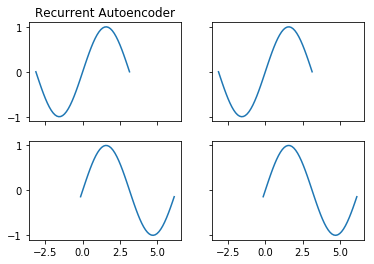

In [3]:
#plt.xkcd()

x1 = np.linspace(-np.pi, np.pi)
y1 = np.sin(x1)
phi = 3
x2 = np.linspace(-np.pi+phi, np.pi+phi)
y2 = np.sin(x2)

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True)
ax1.plot(x1, y1)
ax1.set_title('Recurrent Autoencoder')
ax2.plot(x1, y1)
ax3.plot(x2, y2)
ax4.plot(x2, y2)
plt.show()

In [6]:
def gen(batch_size):
    seq_length = 10

    batch_x = []
    batch_y = []
    for _ in range(batch_size):
        rand = random.random() * 2 * np.pi

        sig1 = np.sin(np.linspace(0.0 * np.pi + rand,
                                  3.0 * np.pi + rand, seq_length * 2))
        sig2 = np.cos(np.linspace(0.0 * np.pi + rand,
                                  3.0 * np.pi + rand, seq_length * 2))
        x1 = sig1[:seq_length]
        y1 = sig1[seq_length:]
        x2 = sig2[:seq_length]
        y2 = sig2[seq_length:]

        x_ = np.array([x1, x2])
        y_ = np.array([y1, y2])
        x_, y_ = x_.T, y_.T

        batch_x.append(x_)
        batch_y.append(y_)

    batch_x = np.array(batch_x)
    batch_y = np.array(batch_y)

    return batch_x, batch_x#batch_y

In [9]:
batch_size = 100
X_train, _ = gen(batch_size)
m = Sequential()
m.add(LSTM(2, input_shape=(10, 2)))
m.add(RepeatVector(10))
m.add(LSTM(2, return_sequences=True))
print(m.summary())
m.compile(loss='mse', optimizer='adam')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 2)                 40        
_________________________________________________________________
repeat_vector_2 (RepeatVecto (None, 10, 2)             0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 10, 2)             40        
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________
None


In [8]:
history = m.fit(X_train, X_train, nb_epoch=10, batch_size=100)

/home/abdulliaqat/anaconda3/lib/python3.6/site-packages/keras/models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


ValueError: Error when checking target: expected lstm_2 to have shape (None, 10, 4) but got array with shape (100, 10, 2)

/home/abdulliaqat/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


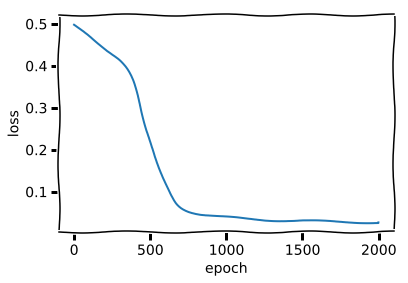

In [16]:
plt.plot(history.history['loss'])
plt.ylabel("loss")
plt.xlabel("epoch")
plt.show()

/home/abdulliaqat/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


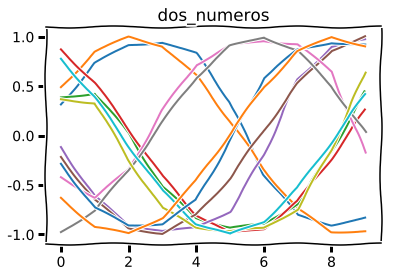

In [21]:
X_test, _ = gen(1)
decoded_imgs = m.predict(X_test)

for i in range(2):
    plt.plot(range(10), decoded_imgs[0, :, i])
    plt.plot(range(10), X_test[0, :, i])
plt.title("dos_numeros")
plt.show()

/home/abdulliaqat/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


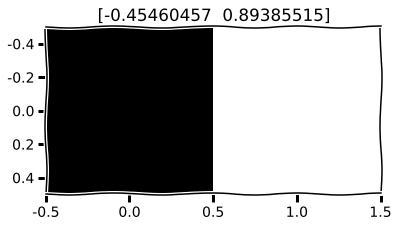

In [22]:
encoder = Model(m.layers[0].input, m.layers[0].output)
encoded_imgs = encoder.predict(X_test)
for i in range(len(encoded_imgs)):
    plt.imshow(encoded_imgs[i].reshape((1, 2)))
    plt.gray()
plt.title(encoded_imgs[i])
dos_numeros = encoded_imgs[i]
plt.show()

In [23]:
m.save('m.h5')
encoder.save('enc.h5')
decoder.save('dec.h5')

NameError: name 'decoder' is not defined

/home/abdulliaqat/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


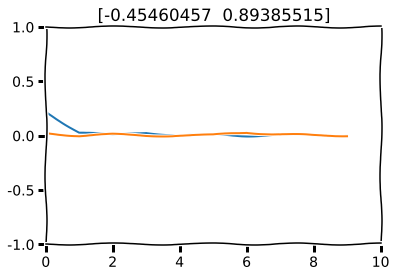

In [24]:
X_test, _ = gen(1)
decoded_imgs = m.predict(X_test)

for i in range(2):
    plt.plot(range(10), np.square(np.abs(X_test[0, :, i] - decoded_imgs[0, :, i])), label="MSE")

plt.ylim(-1,1)
plt.xlim(0,10)
plt.title(dos_numeros)
plt.show()

/home/abdulliaqat/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


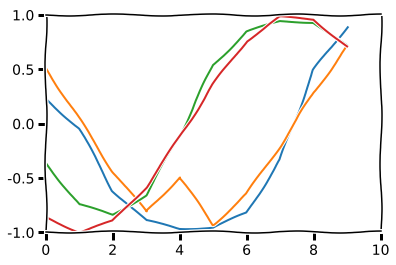

In [25]:
X_test, _ = gen(1)
X_test[0, 4, 0] = X_test[0, 4, 0] + 0.5
decoded_imgs = m.predict(X_test)

for i in range(2):
    plt.plot(decoded_imgs[0, :, i])
    plt.plot(X_test[0, :, i])

plt.ylim(-1,1)
plt.xlim(0,10)
plt.show()

/home/abdulliaqat/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


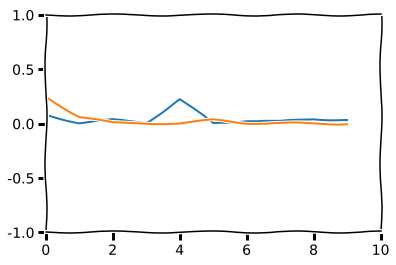

In [26]:
for i in range(2):
    mse = np.square(np.abs(X_test[0, :, i] - decoded_imgs[0, :, i]))
    anomaly = np.argmax(mse)
    if mse[anomaly] > 0.4:
        plt.title("Anomaly detected in series {} at time step: {}".format(i, anomaly))
    plt.plot(range(10), mse, label="MSE")

plt.ylim(-1,1)
plt.xlim(0,10)
plt.show()
